本节课的学习目标:
- 理解词袋模型与TF-IDF的原理；
- 理解代码每一步的运作逻辑；
- 用样例数据成功运行本代码；
- 尝试对比并理解词袋模型与TF-IDF之间的差异；
- 尝试用自己的数据适当调整本代码，并成功运行。

In [77]:
import pandas as pd     # 数据表
import numpy as np     # 数组运算
import nltk     # 英文语料处理
import re    # 正则表达式（用于数据清洗）
import matplotlib.pyplot as plt     # 画图
from wordcloud import WordCloud     # 词云图
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer     # 词袋模型自然语言处理方法
from sklearn.feature_extraction.text import TfidfVectorizer     # TF-IDF自然语言处理方法

In [7]:
# 导入数据
text_ana = pd.read_csv('text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)

In [13]:
text_ana.head()

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone


In [12]:
# 分析语料
text = list(text_ana['text'])
text

['Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.',
 "RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump's Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpg",
 'A top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpg',
 'So the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donate',
 'RT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitter',
 'Threats already higher than all of 2016!  Resist! http://thehill.com/homen

### 数据清洗

In [31]:
# 初始化TweetTokenizer，准备进行分词
tokenizer = TweetTokenizer()
# 初始化WordNetLemmatizer，准备进行词性还原
lemmatizer = WordNetLemmatizer()

# 加载NLTK的停用词列表
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def preprocess_text(text):
    # 转换为小写
    text = text.lower()
    # 移除URL
    text = re.sub(r'http\S+', '', text)
    # 分词
    tokens = tokenizer.tokenize(text)
    # 移除停用词和非字母字符
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token!='rt' and token not in stop_words]
    return ' '.join(tokens)

In [35]:
# 得到语料预处理结果text_ana['text_clean']
text_ana['text_clean'] = text_ana['text'].apply(preprocess_text)
text_ana

,id,screen_name,time,link,text,source,text_clean
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social,republican trying steal health care million pe...
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android,rep mark veasay introduced bill ensure taxpaye...
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone,top u science office went dark tonight good qt...
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad,fundraising quarter end hour mo would really a...
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone,important story
...,...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone,report fire damage calling online information ...
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone,wildfire burned area many danger may remain fo...
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client,update saturday customer experiencing outage a...
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone,evening update rye fire contained per


In [37]:
# 展示语料预处理结果
text_bow = list(text_ana['text_clean'])
text_bow

['republican trying steal health care million people order help wealthiest',
 'rep mark veasay introduced bill ensure taxpayer fund used support election commission',
 'top u science office went dark tonight good qt science division mic drop',
 'fundraising quarter end hour mo would really appreciate contribution thank much',
 'important story',
 'threat already higher resist',
 'happy birthday',
 'read article one finest officer achieving american dream',
 'year ago today official ribbon cutting museum dc triggered spacecraft orbiting mar',
 'great job daylen qt eastern shore little league player invited national mlb event',
 'john jesus said way truth life one come father',
 'inspired today begin annual pushup month join fun',
 'get er done qt inspired today begin annual pushup month join fun',
 'top morning well qt',
 'tmi qt always get pork chop breakfast cracker barrel',
 'b c people disagree policy winning move call monster scream goal kill people qt thought ben sasse monster',
 

### 词袋模型

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

简单来说，词袋模型可以帮助大家计算词频。

In [53]:
# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_bow)

In [54]:
# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (300000, 50343)


In [55]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['aa' 'aaa' 'aaaa' ... '투표하십시오' '한국어' 'ﬂees']


这里特别介绍一下vectorizer.fit()函数与vectorizer.fit_transform()的区别：
- vectorizer.fit()只从语料中学习词汇，并不将学习到的结果转化为矩阵。
- vectorizer.fit_transform()在vectorizer.fit()的基础上将结果转化为矩阵，也就是说这一函数的输出是一个矩阵。

如果语料较少，两个函数可以放在一起直接用vectorizer.fit_transform()，但当数据量较大时（例如我们的样例语料），这个矩阵的长度是惊人的，也是高度占用内存的。因此，我们推荐在理解上述两个函数的基础上按照需求使用。

#### 词频统计

In [93]:
vectorizer.fit(text_ana['text_clean'])

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 得到词频矩阵
bow_matrix = vectorizer.transform(text_ana['text_clean'])

# 计算词频统计
word_freq = dict(zip(feature_words, bow_matrix.sum(axis=0).A1))

In [66]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

50343

In [65]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('qt', 35691),
 ('tax', 32917),
 ('today', 22560),
 ('american', 21789),
 ('bill', 21175),
 ('family', 18300),
 ('trump', 16110),
 ('need', 15353),
 ('health', 14041),
 ('house', 13489),
 ('great', 13448),
 ('people', 13252),
 ('help', 13175),
 ('must', 12532),
 ('act', 12383),
 ('care', 11742),
 ('time', 11684),
 ('thank', 11526),
 ('work', 11261),
 ('new', 11012),
 ('day', 10579),
 ('year', 10463),
 ('plan', 10451),
 ('congress', 10362),
 ('would', 10213),
 ('support', 10210),
 ('cut', 10197),
 ('make', 9989),
 ('senate', 9933),
 ('job', 9873),
 ('vote', 9703),
 ('get', 9653),
 ('one', 9315),
 ('state', 9265),
 ('republican', 8771),
 ('gop', 8515),
 ('community', 8495),
 ('right', 8166),
 ('reform', 8004),
 ('million', 7749),
 ('see', 7673),
 ('president', 7644),
 ('thanks', 7615),
 ('country', 7444),
 ('working', 7332),
 ('live', 7199),
 ('proud', 7116),
 ('watch', 7042),
 ('say', 6893),
 ('back', 6803),
 ('join', 6768),
 ('like', 6618),
 ('woman', 6559),
 ('week', 6392),
 ('keep',

#### 词云图

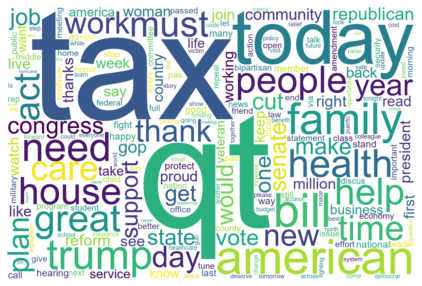

<Figure size 432x288 with 0 Axes>

In [90]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(width=1200, height=800, background_color='white', font_path='arial.ttf').generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

### TF-IDF

TF-IDF也是一种自然语言处理方法（NLP），且是一个无监督式机器学习模型。与词袋模型类似，它也能够对语料进行“词频”分析，只不过这次的“词频”不是简单的计数，而是一个“权重”。TF-IDF会衡量一个词在语料中的重要性，而不是简单地计算词频。例如：“and”这个词可能在语料中出现的频率很高，在每条语料中都可能会出现，但它重要吗？可见，它并不是一个有高度实意的词，因而并不那么重要。在这种情况下，TF-IDF通过考虑逆文档频率而突出了那些有实意的关键词的地位。

In [82]:
# 初始化TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_ana['text_clean'])

# 获取词汇表
feature_words_tfidf = tfidf_vectorizer.get_feature_names_out()

# 得到TF-IDF矩阵
tfidf_matrix = tfidf_vectorizer.transform(text_ana['text_clean'])

#### 词频统计

In [83]:
# 计算词频统计
word_freq_tfidf = dict(zip(feature_words_tfidf, tfidf_matrix.sum(axis=0).A1))

In [84]:
# 词袋模型中不重复的词汇的数量
len(word_freq_tfidf)

50343

In [86]:
# 观察词袋模型的词频计数结果
sorted(word_freq_tfidf.items(), key=lambda x: x[1], reverse=True)

[('tax', 5180.545497145718),
 ('qt', 3841.359475002151),
 ('today', 3805.8085054156195),
 ('american', 3660.8503887238885),
 ('bill', 3522.1923505147197),
 ('family', 3260.8511214669325),
 ('need', 2833.709029066937),
 ('health', 2659.4419866936964),
 ('great', 2617.9644684162113),
 ('trump', 2611.60725910912),
 ('house', 2582.5944660024375),
 ('thank', 2569.782916357559),
 ('help', 2530.8221847017485),
 ('people', 2395.2843652992633),
 ('act', 2366.4103401395205),
 ('must', 2364.9248126643392),
 ('care', 2328.6935186780643),
 ('time', 2319.7201143358307),
 ('work', 2230.1700270079878),
 ('day', 2190.1692590971156),
 ('support', 2145.6521690665713),
 ('plan', 2140.4090928477),
 ('vote', 2065.02021705732),
 ('congress', 2050.974839837177),
 ('cut', 2042.9794641407216),
 ('new', 2042.81743127259),
 ('job', 2028.4629374133278),
 ('senate', 1986.7277742798428),
 ('make', 1976.7661840769822),
 ('year', 1974.4667740019281),
 ('get', 1932.4935967521342),
 ('would', 1892.429703402153),
 ('live

#### 词云图

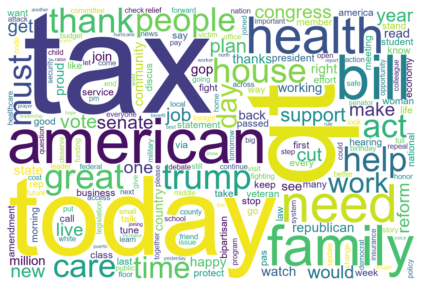

In [91]:
# 绘制词云图
wordcloud_tfidf = WordCloud(width=1200, height=800, background_color='white', font_path='arial.ttf').generate_from_frequencies(word_freq_tfidf)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.show()